In [ ]:
# Importing required libraries
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations
import seaborn as sns  # Library for advanced data visualization
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets
from sklearn.metrics import confusion_matrix    # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report   # Import the classification_report function for detailed classification metrics
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier model
from sklearn.linear_model import LogisticRegression  # Importing Logistic regression classifier
from sklearn.svm import SVC     # Import the SVC class for support vector machine classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score  # Function to calculate accuracy score

In [ ]:
df=pd.read_csv('/content/IPL Matches 2008-2020.csv')

In [ ]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
df.shape

(816, 17)

In [ ]:
df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
df['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
df['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
df.team1.replace({'Rising Pune Supergiant':'Lucknow Super Giants'},regex=True, inplace=True)
df.team2.replace({'Rising Pune Supergiant':'Lucknow Super Giants'},regex=True, inplace=True)
df.winner.replace({'Rising Pune Supergiant':'Lucknow Super Giants'},regex=True, inplace=True)
df.toss_winner.replace({'Rising Pune Supergiant':'Lucknow Super Giants'},regex=True, inplace=True)

df.team1.replace({'Deccan Chargers':'Sunrisers Hyderabad'},regex=True, inplace=True)
df.team2.replace({'Deccan Chargers':'Sunrisers Hyderabad'},regex=True, inplace=True)
df.winner.replace({'Deccan Chargers':'Sunrisers Hyderabad'},regex=True, inplace=True)
df.toss_winner.replace({'Deccan Chargers':'Sunrisers Hyderabad'},regex=True, inplace=True)

df.team1.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True, inplace=True)
df.team2.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True, inplace=True)
df.winner.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True, inplace=True)
df.toss_winner.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True, inplace=True)

df.team1.replace({'Pune Warriors':'Lucknow Super Giants'},regex=True, inplace=True)
df.team2.replace({'Pune Warriors':'Lucknow Super Giants'},regex=True, inplace=True)
df.winner.replace({'Pune Warriors':'Lucknow Super Giants'},regex=True, inplace=True)
df.toss_winner.replace({'Pune Warriors':'Lucknow Super Giants'},regex=True, inplace=True)

In [ ]:
df.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
df['city'].fillna('Unknown', inplace=True)

In [ ]:
columns_to_fill = ['player_of_match', 'result', 'eliminator']
df[columns_to_fill] = df[columns_to_fill].fillna('Not Available')


In [ ]:
df['result_margin'].fillna(df['result_margin'].mean(),inplace=True)

In [ ]:
df.isna().sum()

id                   0
city                 0
date                 0
player_of_match      0
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               0
result_margin        0
eliminator           0
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
df.drop(['id','method'], axis=1, inplace=True)

In [ ]:
df.dropna(subset=['winner'], inplace=True)

In [ ]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'season' column
df['season'] = pd.DatetimeIndex(df['date']).year

In [ ]:
df.team1.replace({'Lucknow Super Giants':'LSG'},regex=True, inplace=True)
df.team2.replace({'Lucknow Super Giants':'LSG'},regex=True, inplace=True)
df.winner.replace({'Lucknow Super Giants':'LSG'},regex=True, inplace=True)
df.toss_winner.replace({'Lucknow Super Giants':'LSG'},regex=True, inplace=True)

df.team1.replace({'Royal Challengers Bangalore':'RCB'},regex=True, inplace=True)
df.team2.replace({'Royal Challengers Bangalore':'RCB'},regex=True, inplace=True)
df.winner.replace({'Royal Challengers Bangalore':'RCB'},regex=True, inplace=True)
df.toss_winner.replace({'Royal Challengers Bangalore':'RCB'},regex=True, inplace=True)

df.team1.replace({'Chennai Super Kings':'CSK'},regex=True, inplace=True)
df.team2.replace({'Chennai Super Kings':'CSK'},regex=True, inplace=True)
df.winner.replace({'Chennai Super Kings':'CSK'},regex=True, inplace=True)
df.toss_winner.replace({'Chennai Super Kings':'CSK'},regex=True, inplace=True)

df.team1.replace({'Mumbai Indians':'MI'},regex=True, inplace=True)
df.team2.replace({'Mumbai Indians':'MI'},regex=True, inplace=True)
df.winner.replace({'Mumbai Indians':'MI'},regex=True, inplace=True)
df.toss_winner.replace({'Mumbai Indians':'MI'},regex=True, inplace=True)

df.team1.replace({'Delhi Capitals':'DC'},regex=True, inplace=True)
df.team2.replace({'Delhi Capitals':'DC'},regex=True, inplace=True)
df.winner.replace({'Delhi Capitals':'DC'},regex=True, inplace=True)
df.toss_winner.replace({'Delhi Capitals':'DC'},regex=True, inplace=True)

df.team1.replace({'Kings XI Punjab':'PBKS'},regex=True, inplace=True)
df.team2.replace({'Kings XI Punjab':'PBKS'},regex=True, inplace=True)
df.winner.replace({'Kings XI Punjab':'PBKS'},regex=True, inplace=True)
df.toss_winner.replace({'Kings XI Punjab':'PBKS'},regex=True, inplace=True)

df.team1.replace({'Rajasthan Royals':'RR'},regex=True, inplace=True)
df.team2.replace({'Rajasthan Royals':'RR'},regex=True, inplace=True)
df.winner.replace({'Rajasthan Royals':'RR'},regex=True, inplace=True)
df.toss_winner.replace({'Rajasthan Royals':'RR'},regex=True, inplace=True)

df.team1.replace({'Sunrisers Hyderabad':'SRH'},regex=True, inplace=True)
df.team2.replace({'Sunrisers Hyderabad':'SRH'},regex=True, inplace=True)
df.winner.replace({'Sunrisers Hyderabad':'SRH'},regex=True, inplace=True)
df.toss_winner.replace({'Sunrisers Hyderabad':'SRH'},regex=True, inplace=True)

df.team1.replace({'Gujarat Lions':'GL'},regex=True, inplace=True)
df.team2.replace({'Gujarat Lions':'GL'},regex=True, inplace=True)
df.winner.replace({'Gujarat Lions':'GL'},regex=True, inplace=True)
df.toss_winner.replace({'Gujarat Lions':'GL'},regex=True, inplace=True)

df.team1.replace({'Royal Challengers Bangalore':'RCB'},regex=True, inplace=True)
df.team2.replace({'Royal Challengers Bangalore':'RCB'},regex=True, inplace=True)
df.winner.replace({'Royal Challengers Bangalore':'RCB'},regex=True, inplace=True)
df.toss_winner.replace({'Royal Challengers Bangalore':'RCB'},regex=True, inplace=True)

df.team1.replace({'Kochi Tuskers Kerala':'KTK'},regex=True, inplace=True)
df.team2.replace({'Kochi Tuskers Kerala':'KTK'},regex=True, inplace=True)
df.winner.replace({'Kochi Tuskers Kerala':'KTK'},regex=True, inplace=True)
df.toss_winner.replace({'Kochi Tuskers Kerala':'KTK'},regex=True, inplace=True)

df.team1.replace({'LSGs':'LSG'},regex=True, inplace=True)
df.team2.replace({'LSGs':'LSG'},regex=True, inplace=True)
df.winner.replace({'LSGs':'LSG'},regex=True, inplace=True)
df.toss_winner.replace({'LSGs':'LSG'},regex=True, inplace=True)

df.team1.replace({'Kolkata Knight Riders':'KKR'},regex=True, inplace=True)
df.team2.replace({'Kolkata Knight Riders':'KKR'},regex=True, inplace=True)
df.winner.replace({'Kolkata Knight Riders':'KKR'},regex=True, inplace=True)
df.toss_winner.replace({'Kolkata Knight Riders':'KKR'},regex=True, inplace=True)

In [ ]:
df.team1.unique()

array(['RCB', 'PBKS', 'DC', 'MI', 'KKR', 'RR', 'SRH', 'CSK', 'KTK', 'LSG',
       'GL'], dtype=object)

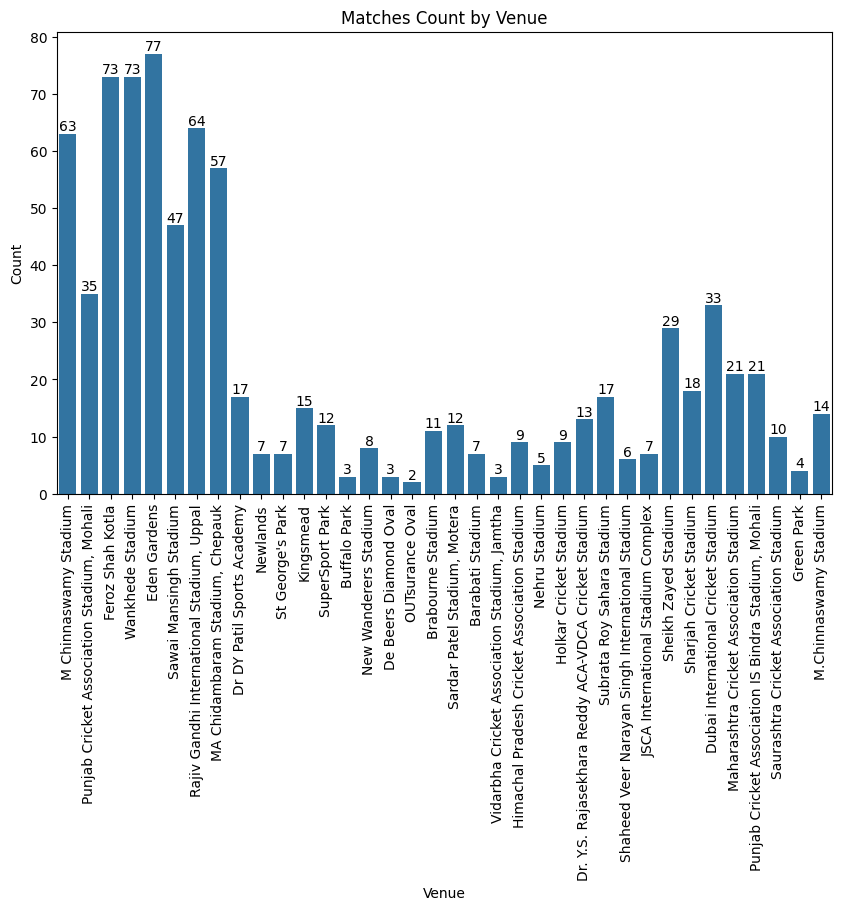

In [ ]:
plt.figure(figsize=(10,6))

# Use Seaborn's countplot to plot the number of matches played at each venue
# The 'x' parameter is set to 'venue', and 'data' specifies the DataFrame to use for plotting
ax = sns.countplot(x='venue',data=df)
plt.xticks(rotation=90)

plt.xlabel('Venue')
plt.ylabel('Count')

plt.title('Matches Count by Venue')
for i in ax.containers:
    ax.bar_label(i)

plt.show()

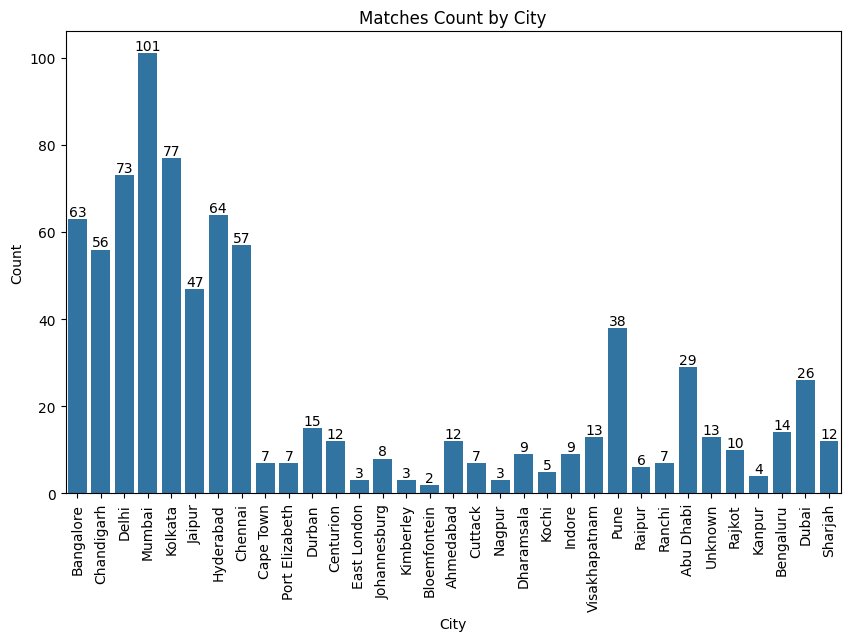

In [ ]:
plt.figure(figsize=(10,6))


ax = sns.countplot(x='city',data=df)
plt.xticks(rotation=90)

plt.xlabel('City')
plt.ylabel('Count')

plt.title('Matches Count by City')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

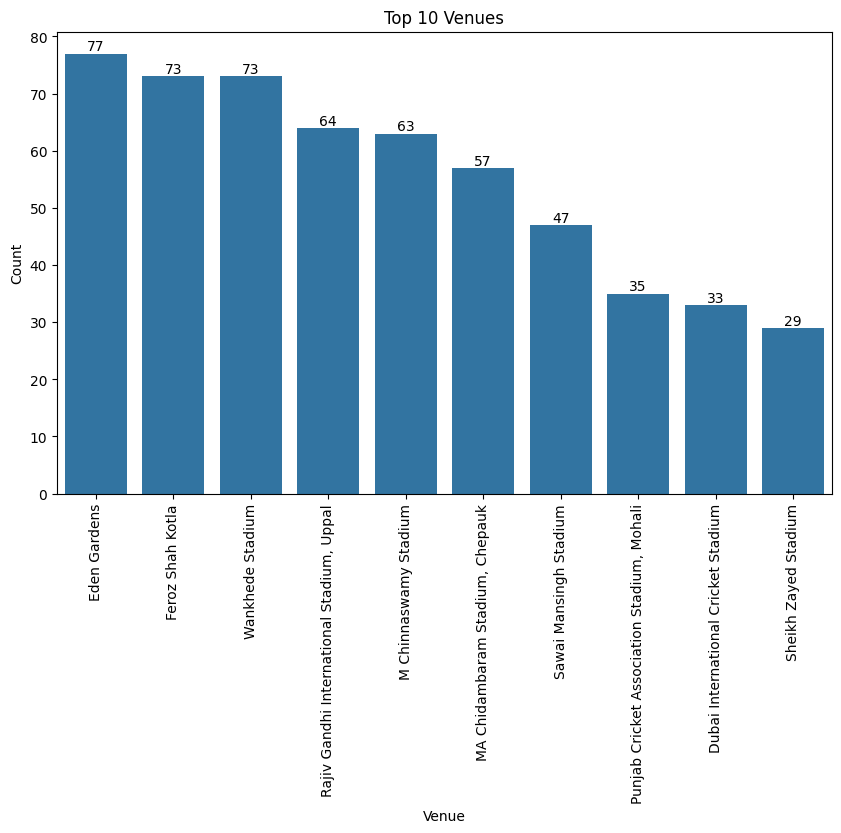

In [ ]:
# get the top 10 venues with the highest number of matches played
top_player = df['venue'].value_counts().head(10)

plt.figure(figsize=(10,6))

ax = sns.barplot(x=top_player.index, y=top_player.values)

plt.xlabel('Venue')
plt.ylabel('Count')

plt.title('Top 10 Venues')

plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)

plt.show()

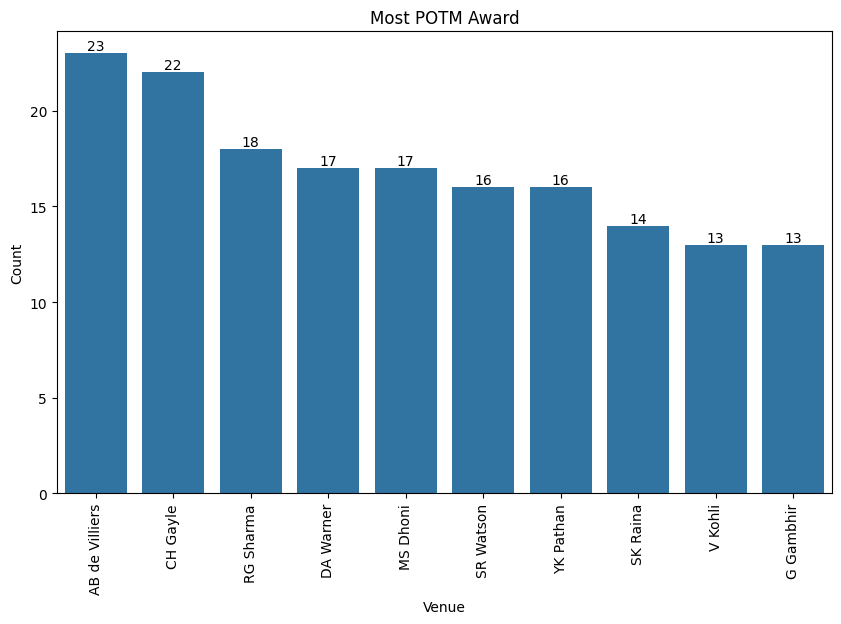

In [ ]:
# get the top 10 players with the highest number of player of the match awards
top_player = df['player_of_match'].value_counts().head(10)

plt.figure(figsize=(10,6))

ax = sns.barplot(x=top_player.index, y=top_player.values)

plt.xlabel('Venue')
plt.ylabel('Count')

plt.title('Most POTM Award')

plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [ ]:
# Extracting day, month, and year from the 'date' column
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

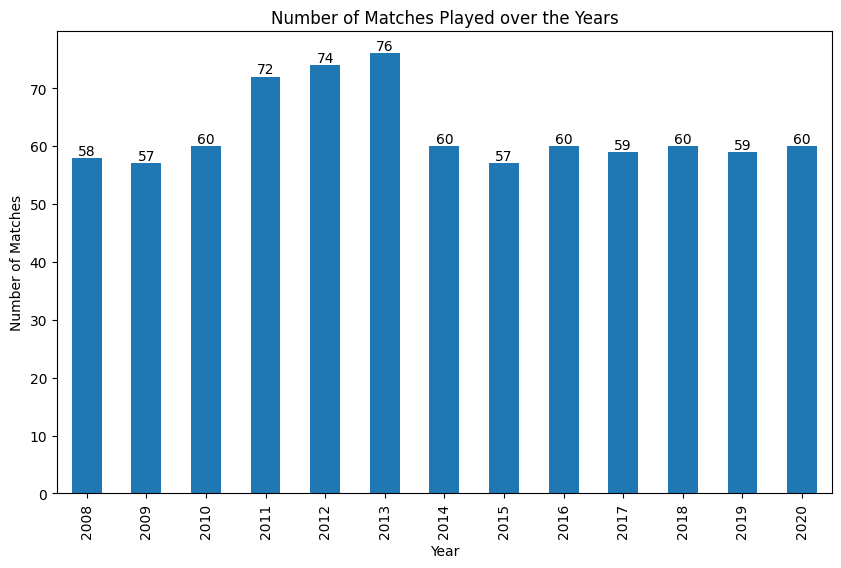

In [ ]:
# Number of matches played over the years
plt.figure(figsize=(10,6))
ax = df['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played over the Years')
for i in ax.containers:
    ax.bar_label(i)

plt.show()

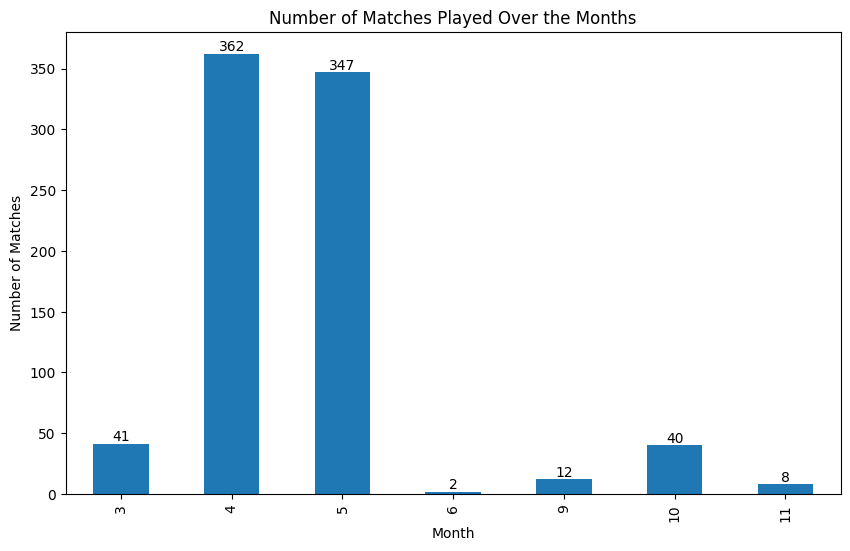

In [ ]:
# Number of matches played over the months
plt.figure(figsize=(10,6))
d = df['month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played Over the Months')
for i in d.containers:
    d.bar_label(i)
plt.show()

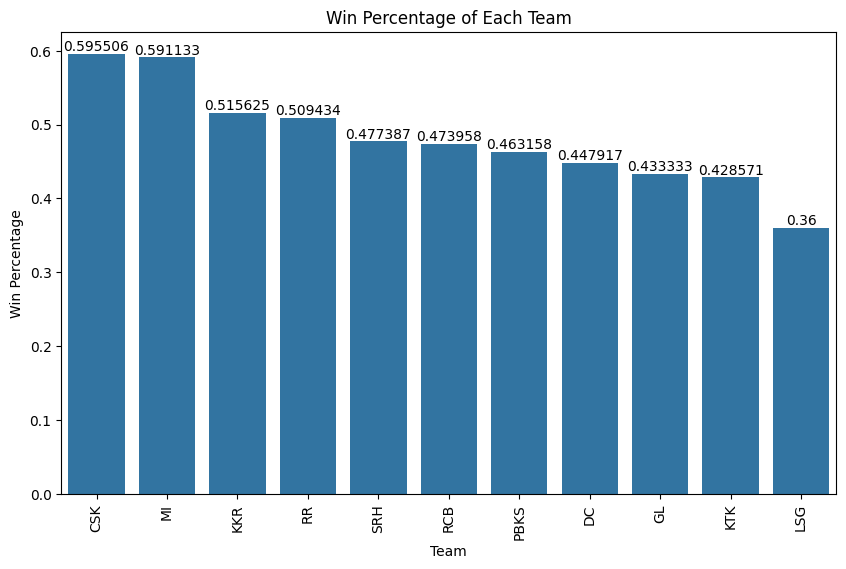

In [ ]:
# Calculate win percentage for each team
team_wins = df['winner'].value_counts()
team_matches = df['team1'].value_counts() + df['team2'].value_counts()
win_percentage = (team_wins/team_matches).sort_values(ascending=False)

# Plot win percentage for each team
plt.figure(figsize=(10,6))
ax = sns.barplot(x=win_percentage.index, y=win_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Each Team')
for i in ax.containers:
    ax.bar_label(i)

plt.show()

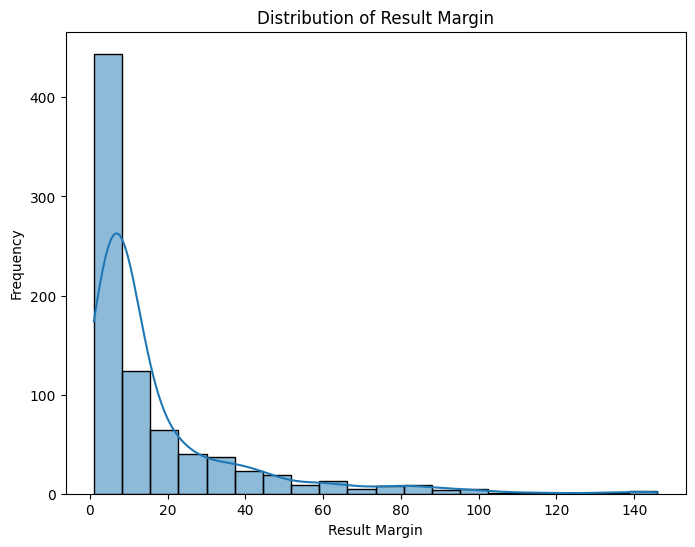

In [ ]:
# Distribution of Result Margin
plt.figure(figsize=(8,6))
sns.histplot(df['result_margin'], bins=20, kde=True)
plt.xlabel('Result Margin')
plt.ylabel('Frequency')
plt.title('Distribution of Result Margin')
plt.show()

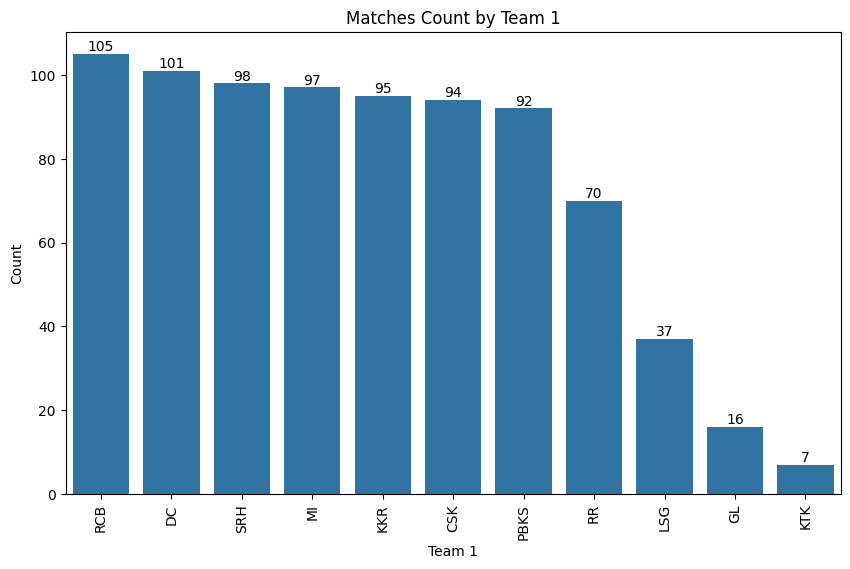

In [ ]:
# Team 1
team1_counts = df['team1'].value_counts()
plt.figure(figsize=(10,6))
ax = sns.countplot(x='team1', data=df, order=team1_counts.index)
plt.xlabel('Team 1')
plt.ylabel('Count')
plt.title('Matches Count by Team 1')
plt.xticks(rotation=90)

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

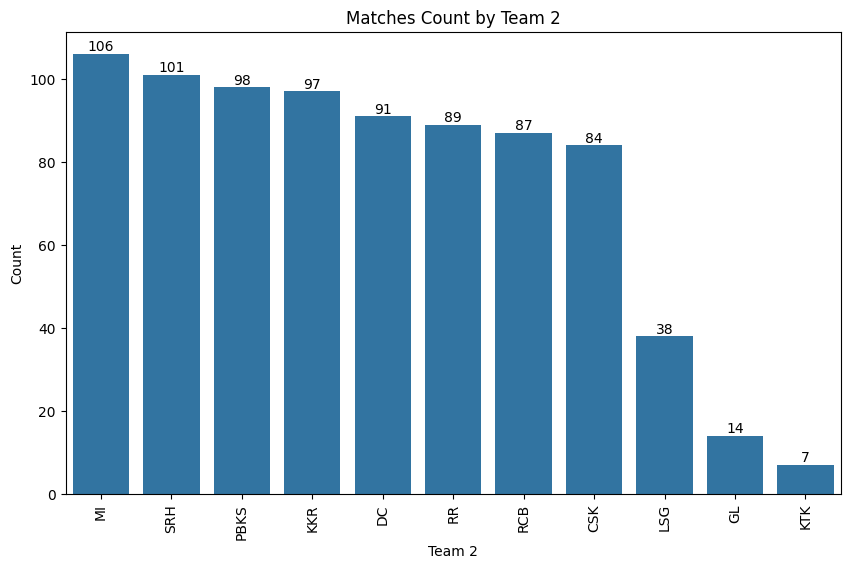

In [ ]:
# Team 2
team2_counts = df['team2'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='team2', data=df, order=team2_counts.index)
plt.xlabel('Team 2')
plt.ylabel('Count')
plt.title('Matches Count by Team 2')
plt.xticks(rotation=90)

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

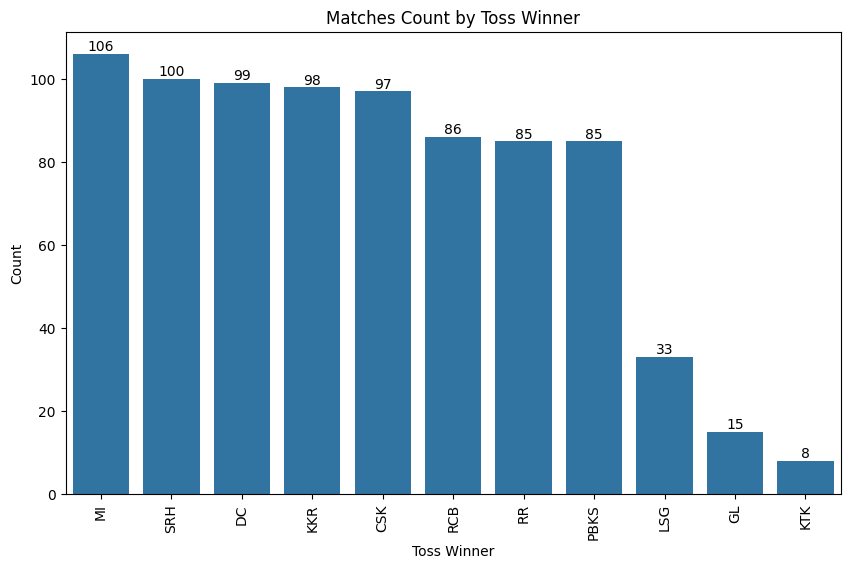

In [ ]:
# Toss Winner
toss_winner_counts = df['toss_winner'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='toss_winner', data=df, order=toss_winner_counts.index)
plt.xlabel('Toss Winner')
plt.ylabel('Count')
plt.title('Matches Count by Toss Winner')
plt.xticks(rotation=90)

for i in ax.containers:
    ax.bar_label(i)
plt.show()

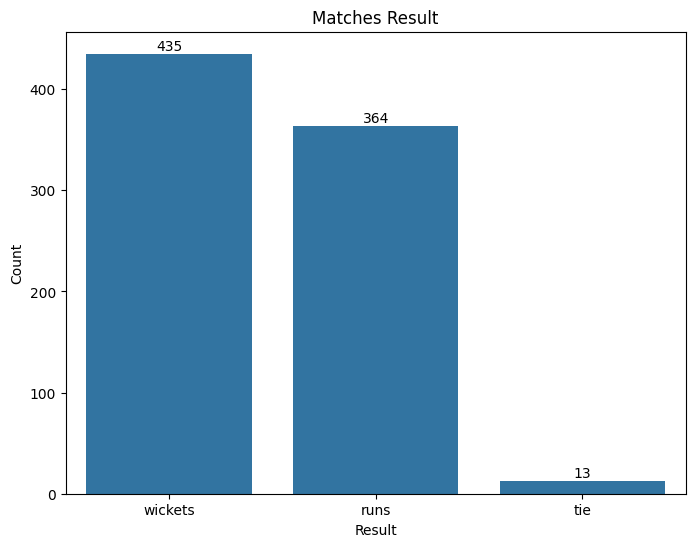

In [ ]:
# Result
result_counts = df['result'].value_counts()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='result', data=df, order=result_counts.index)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Matches Result')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

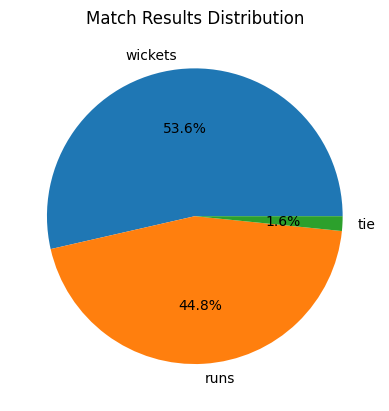

In [ ]:
# Pie Chart
plt.pie(df['result'].value_counts(), labels=df['result'].value_counts().index, autopct='%1.1f%%')
plt.title('Match Results Distribution')
plt.show()

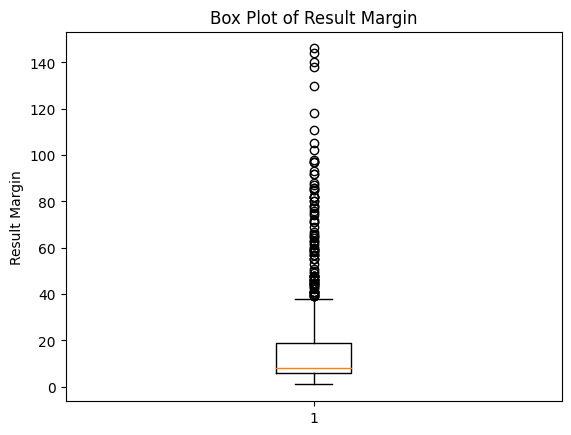

In [ ]:
# Box Plot
plt.boxplot(df['result_margin'])
plt.ylabel('Result Margin')
plt.title('Box Plot of Result Margin')
plt.show()

In [ ]:
# Cross-tabulation
cross_tab = pd.crosstab(df['team1'], df['winner'])
print(cross_tab)

winner  CSK  DC  GL  KKR  KTK  LSG  MI  PBKS  RCB  RR  SRH
team1                                                     
CSK      65   4   0    2    0    1   9     4    2   3    4
DC        6  50   1    6    1    2   7     7    8   5    8
GL        0   2   5    1    0    0   1     2    2   0    3
KKR       6   3   2   55    1    2  10     5    5   4    2
KTK       0   1   0    0    3    0   0     1    1   0    1
LSG       2   3   1    5    0   13   4     1    3   1    4
MI        4   3   1    2    1    4  61     6    4   5    6
PBKS      6   3   2    9    0    1   7    46    5   7    6
RCB       7   6   1    7    0    1  11     7   53   5    7
RR        4   3   0    3    0    0   3     3    6  44    4
SRH       6   8   0    9    0    3   7     6    2   7   50


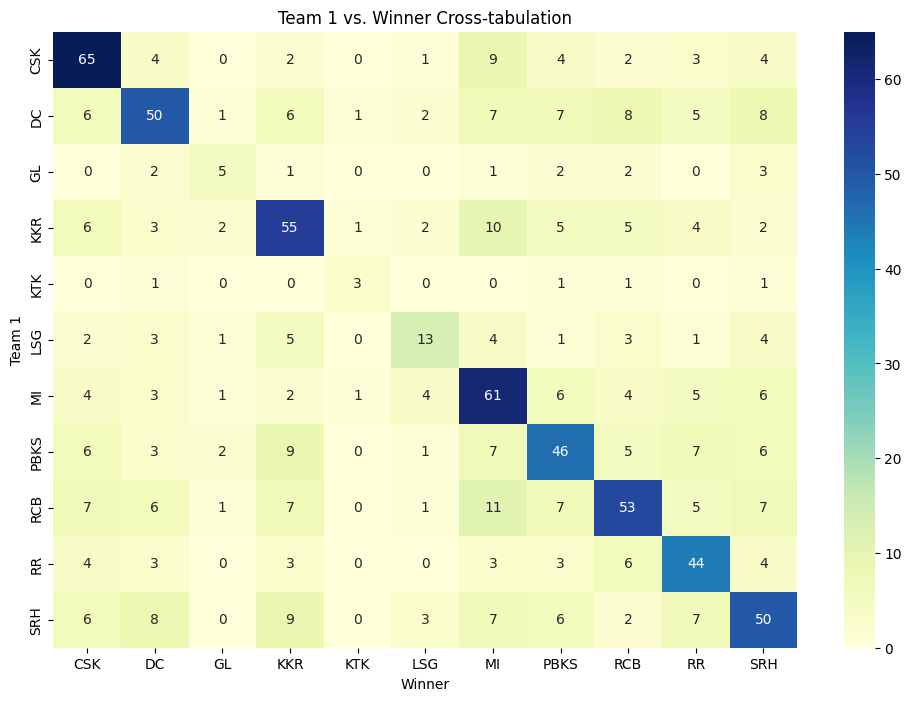

In [ ]:
# Cross-tabulation
cross_tab = pd.crosstab(df['team1'], df['winner'])

# Plotting Heatmap for Cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Winner')
plt.ylabel('Team 1')
plt.title('Team 1 vs. Winner Cross-tabulation')
plt.show()

In [ ]:
team_mapping = {
    'CSK': 1,
    'MI': 2,
    'RCB': 3,
    'KKR': 4,
    'PBKS': 5,
    'SRH': 6,
    'DC': 7,
    'RR': 8,
    'KTK': 9,
    'LSG': 10,
    'GL': 11
}

# Replace team names in 'team1' and 'team2' columns with unique numbers
df['team1'] = df['team1'].map(team_mapping)
df['team2'] = df['team2'].map(team_mapping)

# Replace winner names in 'winner' column with unique numbers
df['winner'] = df['winner'].map(team_mapping)
df['toss_winner'] = df['toss_winner'].map(team_mapping)

In [ ]:
# Create a dictionary to map each unique venue name to a unique number
venue_mapping = {venue: i for i, venue in enumerate(df['venue'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
df['venue'] = df['venue'].map(venue_mapping)

In [ ]:
# Create a dictionary to map 'toss_decision' values to numerical values
temp = {'field': 0, 'bat': 1}

# Use the map() function to replace 'toss_decision' values with numerical values
df['toss_decision'] = df['toss_decision'].map(temp)

In [ ]:
# Create a set of unique umpires
umpires_set = set(df['umpire1'].unique()).union(set(df['umpire2'].unique()))

# Create a dictionary to map umpire names to unique numbers
umpire_dict = {umpire: i for i, umpire in enumerate(umpires_set, 1)}

# Apply the dictionary to create new encoded columns for 'umpire1' and 'umpire2'
df['umpire1'] = df['umpire1'].map(umpire_dict)
df['umpire2'] = df['umpire2'].map(umpire_dict)

In [ ]:
# Create a dictionary to map each unique venue name to a unique number
player_of_match_mapping = {venue: i for i, venue in enumerate(df['player_of_match'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
df['player_of_match'] = df['player_of_match'].map(player_of_match_mapping)

In [ ]:
# Create a dictionary to map each unique venue name to a unique number
city_mapping = {venue: i for i, venue in enumerate(df['city'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
df['city'] = df['city'].map(city_mapping)

In [ ]:
# List of unwanted columns
unwanted_columns = ['date','result','eliminator','season','day','month','year','result_margin']

# Drop the unwanted columns from the DataFrame
df.drop(columns=unwanted_columns, inplace=True)

In [ ]:
X = df.drop(['winner'], axis=1)
Y = df['winner']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Shapes of training and testing sets
print('xtrain shape: ',xtrain.shape)
print('xtest shape: ',xtest.shape)
print('ytrain shape: ',ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (649, 10)
xtest shape:  (163, 10)
ytrain shape:  (649,)
ytest shape:  (163,)


In [ ]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest,ypred)
print("Accuracy: ",accuracy)

Accuracy:  0.2392638036809816


In [ ]:
model = SVC()
model.fit(xtrain, ytrain)

SVC()

In [ ]:
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.18404907975460122


In [ ]:

model = RandomForestClassifier(n_estimators=13)
model.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=13)

In [ ]:
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.5276073619631901
